I'll be answering the following questions along the way:

1. Is there any correlation between the variables?

2. What is the genre distribution?

3. What is the user rating distribution?

4. What is the user rating distribution by genre?

5. What is the price distribution by genre over the years?

6. What is the rate distribution by genre over the years?

7. What is the review distribution by year and genre?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px


# text data
import string
import re
df = pd.read_csv('AmazonBooks.csv')

In [46]:
df = pd.read_csv('AmazonBooks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Author       600 non-null    object 
 2   User Rating  600 non-null    float64
 3   Reviews      600 non-null    int64  
 4   Price        600 non-null    int64  
 5   Year         600 non-null    int64  
 6   Genre        600 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 32.9+ KB


In [47]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [48]:
# Check for correlations
pd.get_dummies(df[['Year','User Rating', 'Price', 'Genre']]).corr()



,Year,User Rating,Price,Genre_Fiction,Genre_Non Fiction
Year,1.000000,0.268492,-0.160882,-0.011190,0.011190
User Rating,0.268492,1.000000,-0.136003,0.104608,-0.104608
Price,-0.160882,-0.136003,1.000000,-0.191820,0.191820
Genre_Fiction,-0.011190,0.104608,-0.191820,1.000000,-1.000000
Genre_Non Fiction,0.011190,-0.104608,0.191820,-1.000000,1.000000


There are no direct correlations visible between any of the variables. This means that the User Rating is not influenced by the genre, price or year of release

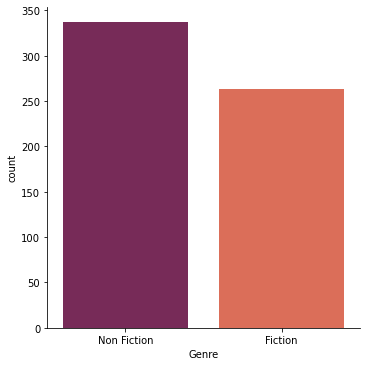

In [27]:
# getting some visualization

sns.catplot(x='Genre',palette="rocket",data=df,kind='count')

plt.savefig("Images Amazon/Chart1.png", bbox_inches="tight",pad_inches=2,transparent=True)

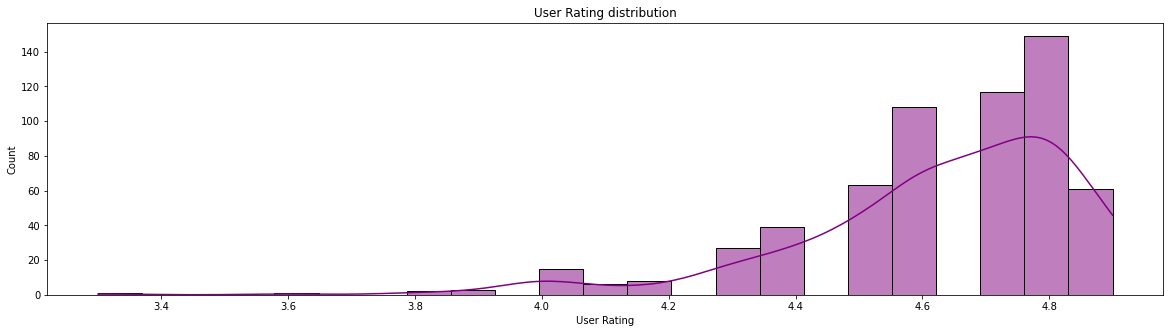

In [31]:
plt.figure(figsize=(20, 5))
sns.histplot(x=df['User Rating'],color="Purple", kde=True, fill=True)
plt.title("User Rating distribution")

plt.savefig("Images Amazon/Chart2.png", bbox_inches="tight",pad_inches=2,transparent=True)

plt.show()



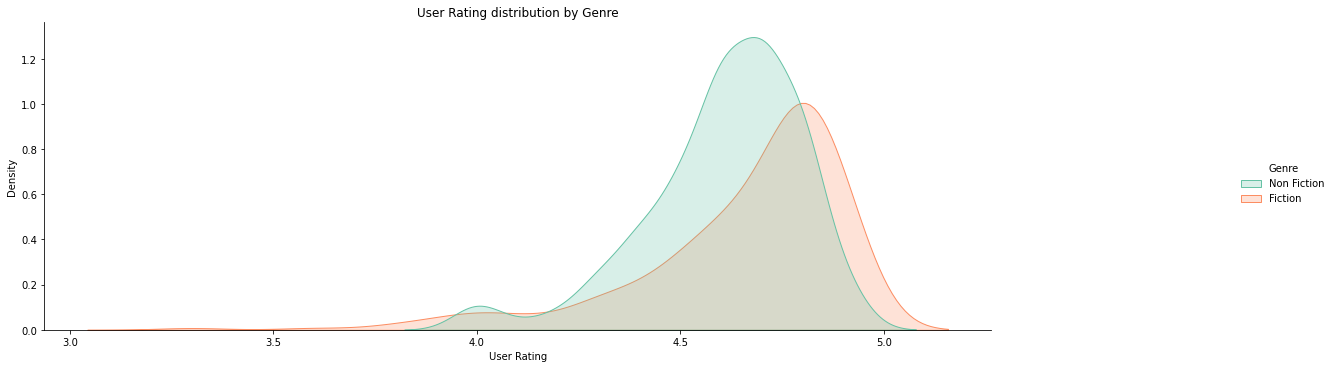

In [30]:
g = sns.displot(x=df['User Rating'], hue=df['Genre'], kind="kde",palette='Set2',fill=True)
plt.title("User Rating distribution by Genre")
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

plt.savefig("Images Amazon/Chart3.png", bbox_inches="tight",pad_inches=2,transparent=True)

plt.show()



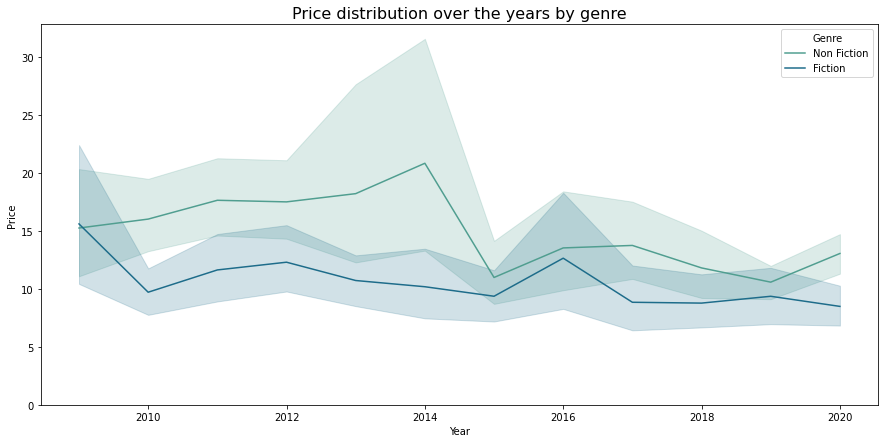

In [32]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,x='Year',y='Price',hue='Genre',palette='crest')
plt.ylim(0)
plt.title('Price distribution over the years by genre',
    fontdict={'fontsize': 16})

plt.savefig("Images Amazon/Chart4.png", bbox_inches="tight",pad_inches=2,transparent=True)

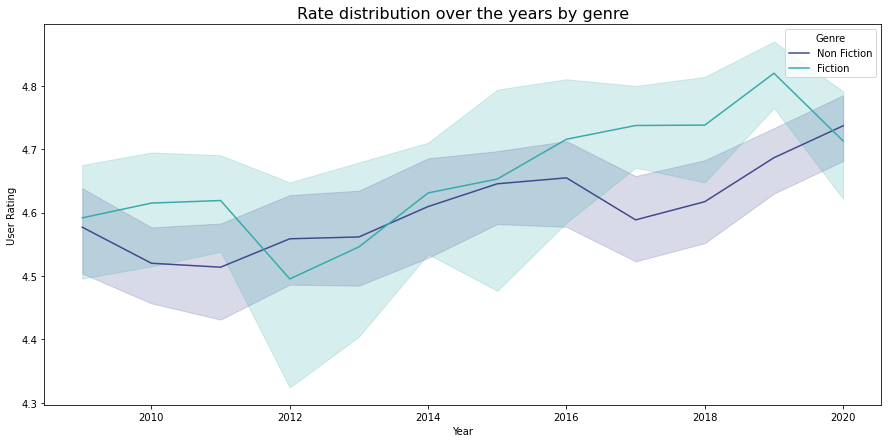

In [33]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,x='Year',y='User Rating',hue='Genre',palette='mako')

plt.title('Rate distribution over the years by genre',
    fontdict={'fontsize': 16})

plt.savefig("Images Amazon/Chart5.png", bbox_inches="tight",pad_inches=2,transparent=True)

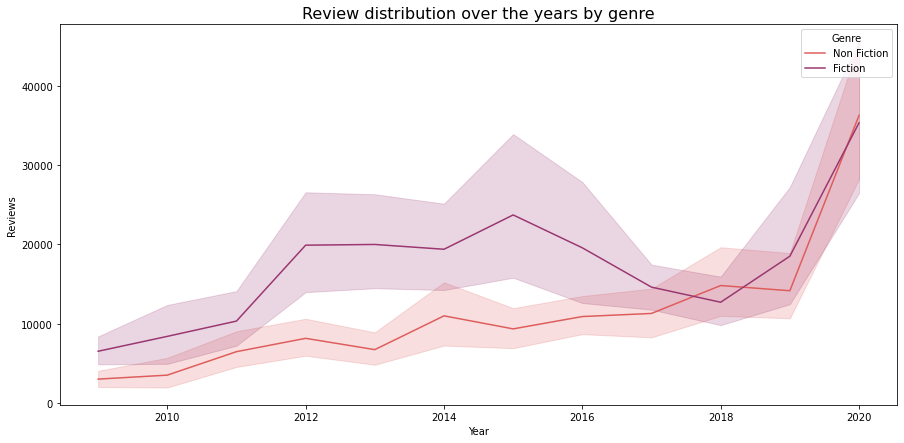

In [34]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,x='Year',y='Reviews',hue='Genre',palette='flare')

plt.title('Review distribution over the years by genre',
    fontdict={'fontsize': 16})

plt.savefig("Images Amazon/Chart6.png", bbox_inches="tight",pad_inches=2,transparent=True)

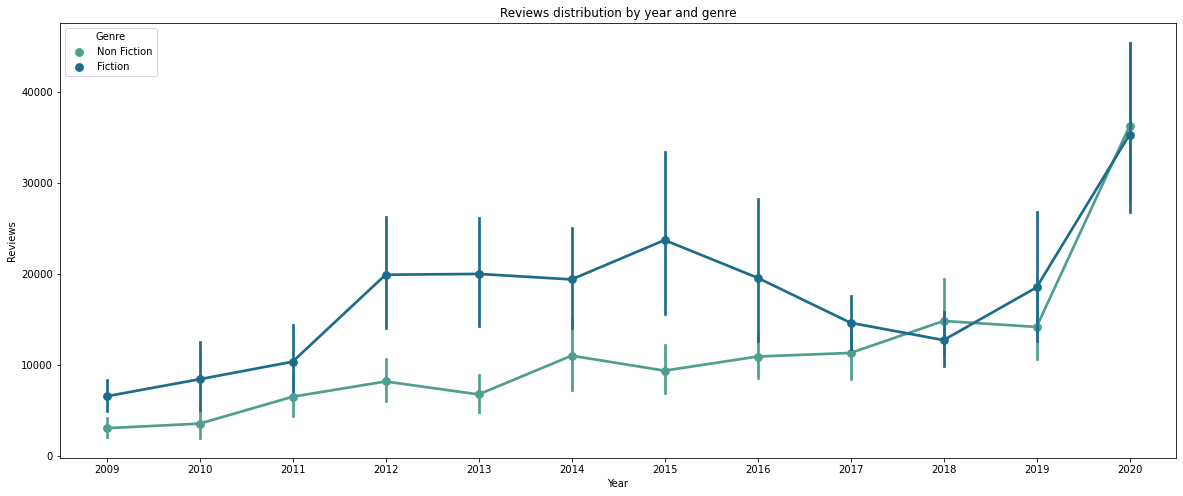

In [35]:
plt.figure(figsize=(20, 8))
sns.pointplot(x="Year", y="Reviews", hue="Genre",palette='crest', data=df, alpha=.3)
plt.title('Reviews distribution by year and genre')

plt.savefig("Images Amazon/Chart7.png", bbox_inches="tight",pad_inches=2,transparent=True)

plt.show()

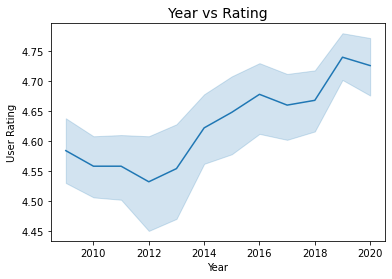

In [36]:
sns.lineplot(data=df, x="Year", y="User Rating")
plt.title('Year vs Rating',fontdict={'fontsize': 14})

plt.savefig("Images Amazon/Chart8.png", bbox_inches="tight",pad_inches=2,transparent=True)


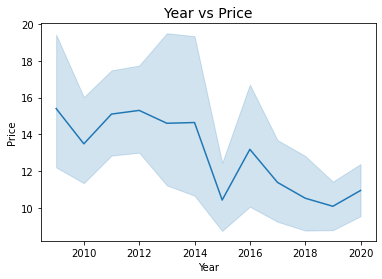

In [39]:
sns.lineplot(data=df, x="Year", y="Price")
plt.title('Year vs Price',fontdict={'fontsize': 14})

plt.savefig("Images Amazon/Chart9.png", bbox_inches="tight",pad_inches=2,transparent=True)

Below are few extra codes

In [13]:
df['User Rating'].value_counts()

4.8    149
4.7    117
4.6    108
4.5     63
4.9     61
4.4     39
4.3     27
4.0     15
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: User Rating, dtype: int64

In [14]:
df['Author'].value_counts()

Jeff Kinney                           13
Suzanne Collins                       12
Gary Chapman                          12
Rick Riordan                          11
American Psychological Association    10
                                      ..
Maurice Sendak                         1
Phil Robertson                         1
Geneen Roth                            1
Glennon Doyle                          1
Margaret Atwood                        1
Name: Author, Length: 275, dtype: int64

In [15]:
# Get the mean User RAting
df_mean = df['User Rating'].mean()

# Get the std of the User Rating
df_std = df['User Rating'].std()

print ('The average User Rating was %.2f with a std of %.2f' %(df_mean,df_std))

The average User Rating was 4.63 with a std of 0.23


In [16]:
# Grab the unique object from the Author Column
author_names = df.Author.unique()
#Show
author_names

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'BreneÌ\x81 Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American P

In [17]:
#Fiding the mean for each author
author_rating = df.groupby('Author')['User Rating'].mean()
author_rating.drop_duplicates()
author_rating.sort_values(ascending=False)


Author
 Bill Martin Jr.    4.9
Charlie Mackesy     4.9
Bill Martin Jr.     4.9
Rush Limbaugh       4.9
Barack Obama        4.9
                   ... 
Muriel Barbery      4.0
Gillian Flynn       4.0
Conor Riordan       4.0
Gallup              4.0
Donna Tartt         3.9
Name: User Rating, Length: 275, dtype: float64

In [18]:
author_rating.head(10)

Author
 Bill Martin Jr.               4.9
 Tara Westover                 4.7
 Workman Publishing            4.8
Abraham Verghese               4.6
Adam Gasiewski                 4.4
Adam Mansbach                  4.8
Adam Wallace                   4.8
Adir Levy                      4.8
Admiral William H. McRaven     4.7
Adult Coloring Book Designs    4.5
Name: User Rating, dtype: float64

In [19]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [20]:
df_filter = df.filter(items=['Author', 'Year','User Rating','Genre'])
df_filter

,Author,Year,User Rating,Genre
0,JJ Smith,2016,4.7,Non Fiction
1,Stephen King,2011,4.6,Fiction
2,Jordan B. Peterson,2018,4.7,Non Fiction
3,George Orwell,2017,4.7,Fiction
4,National Geographic Kids,2019,4.8,Non Fiction
...,...,...,...,...
595,Sean Hannity,2020,4.8,Non Fiction
596,Sharon Jones,2020,4.6,Non Fiction
597,Jennie Allen,2020,4.7,Non Fiction
598,Katie Stokes,2020,4.7,Non Fiction
